**Import Libraries: Begin by importing the necessary libraries :-**

**NumPy, Pandas, Statistics, Matplotlib, Seaborn**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

**Load Data: Read the CSV file into a Pandas DataFrame.**


In [3]:
deliveries=pd.read_csv(r"C:\Users\Lenovo\Downloads\deliveries - deliveries.csv")
matches=pd.read_csv(r"C:\Users\Lenovo\Downloads\matches - matches.csv")

**Check The Top 5 rows In The Dataset  1.Deliveries and 2.Matches**

In [ ]:
deliveries.head()

In [ ]:
matches.head()

In [5]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

**Check Data Information using Info() Function**

In [ ]:
deliveries.info()

In [ ]:
matches.info()

**Data Cleaning :**

**Missing Values Analysis: The dataset was examined for missing values using the isna() function, identifying columns like player_dismissed, dismissal_kind, and fielder with null entries.**

In [ ]:
matches.isna().sum()
matches['city']

**Missing Value Imputation: Unknown values in relevant columns were replaced using the fillna() function. For example, missing entries in categorical columns were filled with "Unknown," while numerical columns were imputed with the median or mean, as appropriate.**

In [ ]:
matches.fillna("Unkown",inplace=True)
matches.head(20)

In [ ]:
deliveries.fillna()

**Q1. Analyze the distribution of total runs across different overs. Are there specific phases of the innings (e.g., powerplay, middle overs, death overs) where scoring rates tend to be higher or lower?**

In [ ]:
run_per_over=deliveries.groupby('over')['total_runs'].sum().reset_index()
power_play_over=run_per_over[run_per_over['over']<=6]['total_runs'].sum()
middle_overs=run_per_over[(run_per_over['over']>6) &(run_per_over['over']<=16) ]['total_runs'].sum()
death_over=run_per_over[run_per_over['over']>16]['total_runs'].sum()

avg_runs_power_play=power_play_over/6
avg_middle_overs=middle_overs/10
avg_death_over=death_over/4

plt.bar(["power_play","middle_over","death_over"],[power_play_over,middle_overs,death_over],color=['yellow','lightgreen','lightblue'])
plt.xlabel("Match_Phases")
plt.ylabel("Total_runs")
plt.title("Runs Distrius")
plt.show()


**Q2. Explore the relationship between the batsman_runs and the type of dismissal (dismissal_kind). Do certain dismissal types tend to occur after batsmen have scored a significant number of runs?**

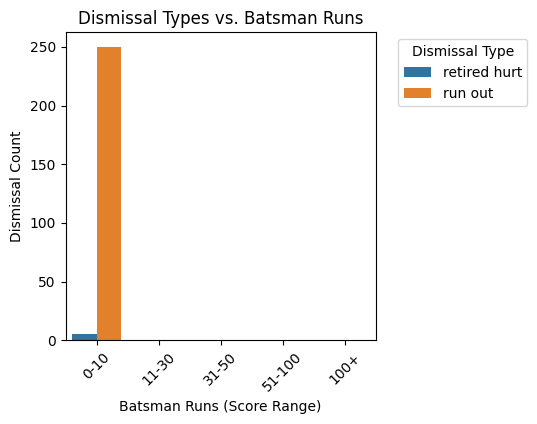

In [13]:


dismissed_df = deliveries[deliveries['dismissal_kind'].notna()].copy()

bins = [0, 10, 30, 50, 100, 200]  
labels = ['0-10', '11-30', '31-50', '51-100', '100+']
dismissed_df.loc[:, 'score_range'] = pd.cut(dismissed_df['batsman_runs'], bins=bins, labels=labels, right=True)

dismissal_counts = dismissed_df.groupby(['score_range', 'dismissal_kind'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(4,4))
sns.barplot(x='score_range', y='count', hue='dismissal_kind', data=dismissal_counts)
plt.xlabel("Batsman Runs (Score Range)")
plt.ylabel("Dismissal Count")
plt.title("Dismissal Types vs. Batsman Runs")
plt.legend(title="Dismissal Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Q3.Compare the average number of total runs scored per over by different batting_teams. Do certain teams have consistently higher or lower scoring rates?**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13596\663241206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batting_team', y='total_runs', data=team_avg_runs, palette="viridis")


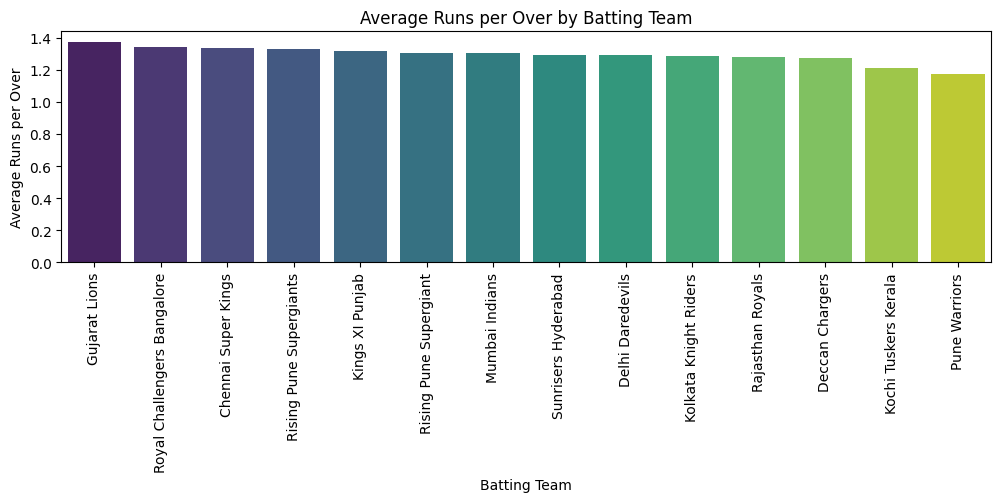

In [26]:
team_runs_per_over = deliveries.groupby(['batting_team', 'over'])['total_runs'].mean().reset_index()
team_avg_runs = team_runs_per_over.groupby('batting_team')['total_runs'].mean().reset_index()
team_avg_runs = team_avg_runs.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12,3))
sns.barplot(x='batting_team', y='total_runs', data=team_avg_runs, palette="viridis")
plt.xlabel("Batting Team")
plt.ylabel("Average Runs per Over")
plt.title("Average Runs per Over by Batting Team")
plt.xticks(rotation=90)
plt.show()

**4. Analyze the frequency and distribution of extras (extra_runs) conceded by bowling_teams across different overs. Are there specifi c phases of the game where teams tend to give away more extras?**

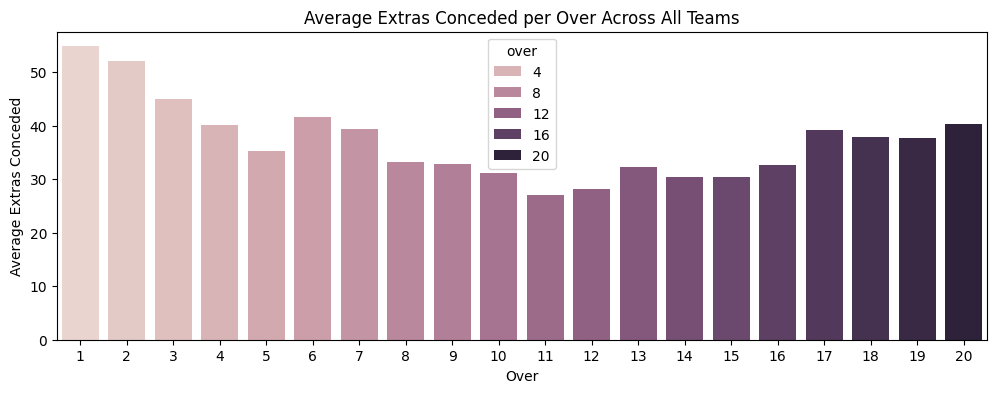

In [40]:
extras_per_over = deliveries.groupby(['bowling_team', 'over'])['extra_runs'].sum().reset_index()
avg_extras_per_over = extras_per_over.groupby('over')['extra_runs'].mean().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(x='over', y='extra_runs', data=avg_extras_per_over,hue='over')
plt.xlabel("Over")
plt.ylabel("Average Extras Conceded")
plt.title("Average Extras Conceded per Over Across All Teams")

plt.show()

**5. Explore the relationship between batsman_runs and the number of balls faced. Do certain batsmen score runs at a faster pace than others?**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13596\1942283069.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strike_rate', y='batsman', data=batsman_stats.head(20), palette="viridis")


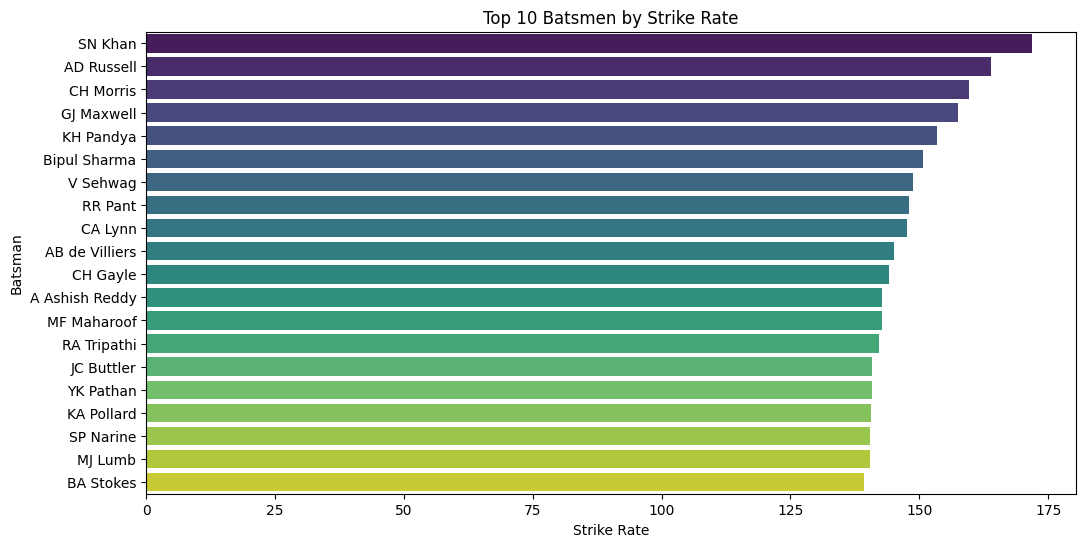

In [52]:
batsman_stats = deliveries.groupby('batsman').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 100]
batsman_stats = batsman_stats.sort_values(by='strike_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='batsman', data=batsman_stats.head(20), palette="viridis")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.title("Top 10 Batsmen by Strike Rate")
plt.show()


**6. Analyze the distribution of dismissal_kind across different bowling_teams. Do certain teams have a higher proportion of specifi c dismissal types (e.g., more catches, more bowled dismissals)?**

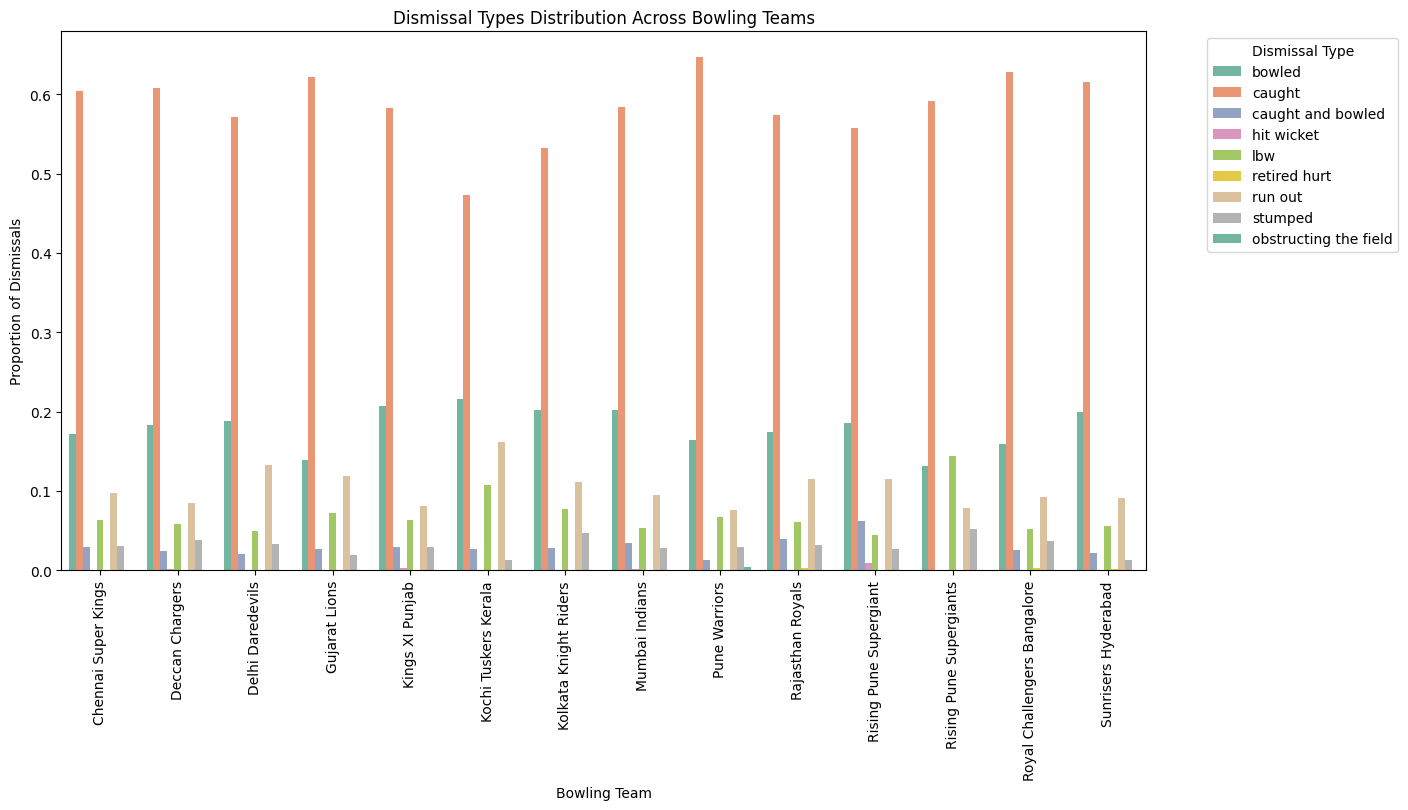

In [64]:

dismissals_df = deliveries[deliveries['dismissal_kind'].notna()]


dismissal_counts = dismissals_df.groupby(['bowling_team', 'dismissal_kind']).size().reset_index(name='count')

dismissal_counts['proportion'] = dismissal_counts.groupby('bowling_team')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(14, 7))
sns.barplot(x='bowling_team', y='proportion', hue='dismissal_kind', data=dismissal_counts, palette="Set2")

plt.xlabel("Bowling Team")
plt.ylabel("Proportion of Dismissals")
plt.title("Dismissal Types Distribution Across Bowling Teams")
plt.xticks(rotation=90)
plt.legend(title="Dismissal Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**7. Explore the relationship between the over and the number of wickets (player_dismissed) taken. Are there specifi c overs where bowlers tend to be more successful in taking wickets?**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13596\2446441499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='over', y='wickets', data=wicket_counts, palette="Blues")


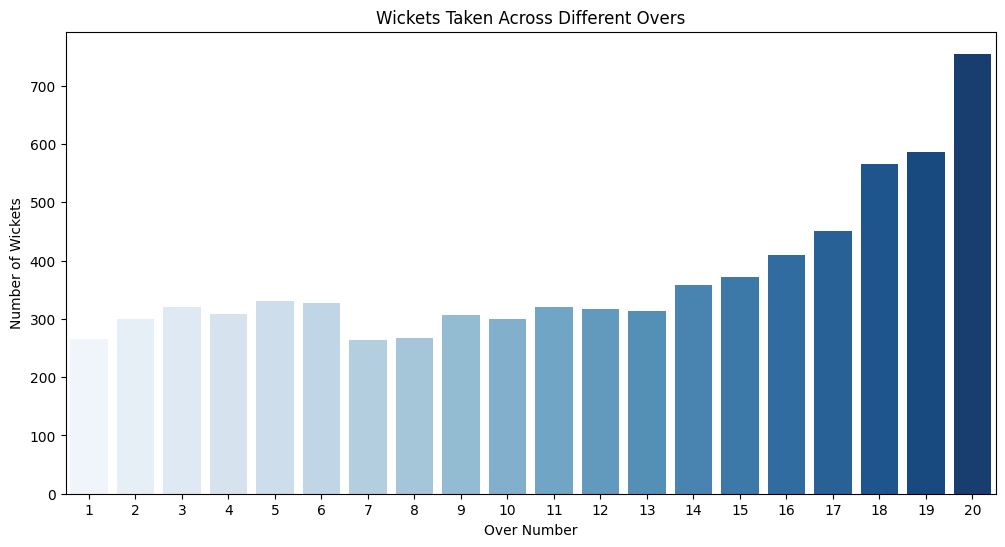

In [ ]:
wickets_per_over = deliveries[deliveries['player_dismissed'].notna()]
wicket_counts = wickets_per_over.groupby('over').size().reset_index(name='wickets')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='over', y='wickets', data=wicket_counts, palette="Blues")

plt.xlabel("Over Number")
plt.ylabel("Number of Wickets")
plt.title("Wickets Taken Across Different Overs")
plt.show()

**8. Analyze the performance of individual bowlers in terms of their economy rate (average runs conceded per over) against different batting_teams. Do certain bowlers have more success against specifi c teams?**

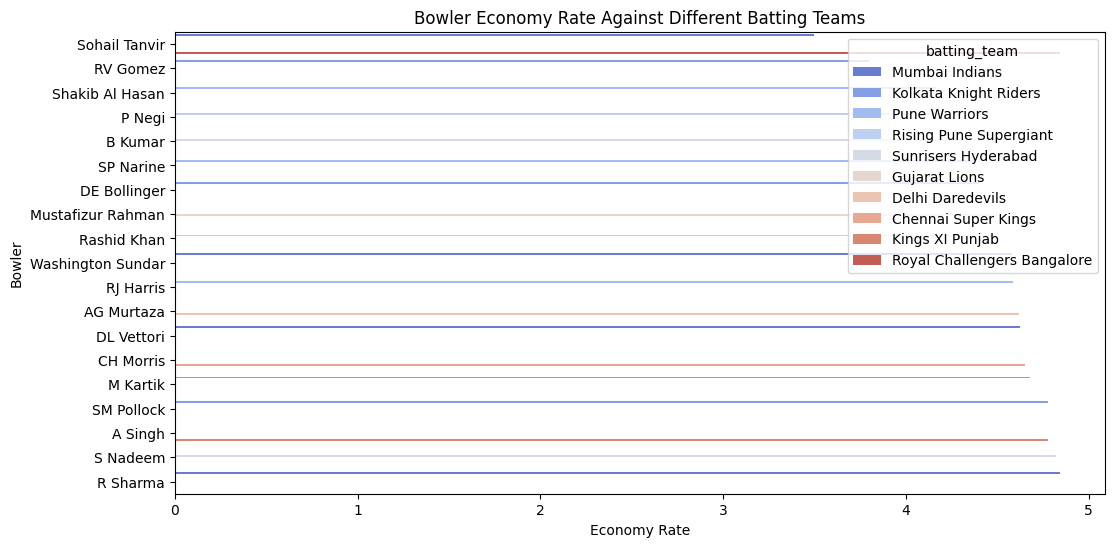

In [78]:

bowler_runs = deliveries.groupby(['bowler', 'batting_team'])['total_runs'].sum().reset_index()

bowler_balls = deliveries.groupby(['bowler', 'batting_team'])['ball'].count().reset_index()

bowler_stats = pd.merge(bowler_runs, bowler_balls, on=['bowler', 'batting_team'])

bowler_stats['overs'] = bowler_stats['ball'] / 6

bowler_stats['economy_rate'] = bowler_stats['total_runs'] / bowler_stats['overs']


bowler_stats = bowler_stats[bowler_stats['overs'] >= 5]

bowler_stats = bowler_stats.sort_values(by='economy_rate')


plt.figure(figsize=(12, 6))
sns.barplot(y='bowler', x='economy_rate', hue='batting_team', data=bowler_stats.head(20), palette="coolwarm")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.title("Bowler Economy Rate Against Different Batting Teams")
plt.show()


**9. Explore the relationship between the type of dismissal_kind and the fi elder involved. Do certain fi elders specialize in particular types of dismissals (e.g., catches, run-outs)?**

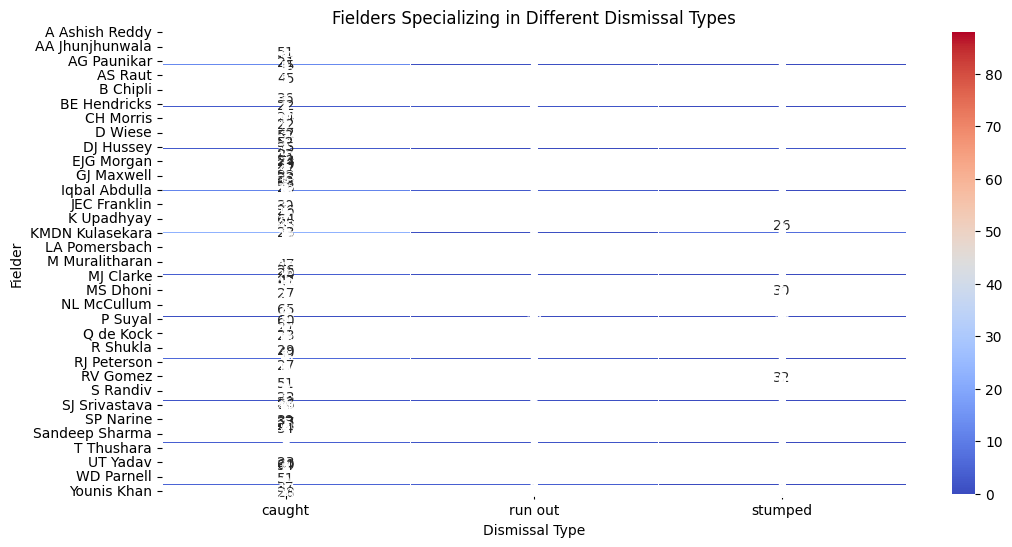

In [ ]:

fielder_dismissals = deliveries[deliveries['fielder'].notna()]
fielder_counts = fielder_dismissals.groupby(['fielder', 'dismissal_kind']).size().reset_index(name='count') 

fielder_pivot = fielder_counts.pivot(index='fielder', columns='dismissal_kind', values='count').fillna(0)

#
plt.figure(figsize=(12, 6))
sns.heatmap(fielder_pivot, cmap="coolwarm",annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Dismissal Type")
plt.ylabel("Fielder")
plt.title("Fielders Specializing in Different Dismissal Types")
plt.show()


**10. Compare the bowling strike rate (average balls bowled per wicket) of different bowlers across different seasons. Are there any noticeable trends or changes in bowling effectiveness over time?**

**11. Analyze the distribution of runs scored by batsman across different batting positions (e.g., opening batsmen, middle-order batsmen). Do certain batting positions tend to score more runs?**

**12. Explore the relationship between the batsman and the bowler in terms of dismissal frequency. Do certain batsmen struggle against specifi c bowlers?**

**13. Analyze the runs scored by different pairs of batsman and non_striker to identify successful partnerships. Are there specifi c partnerships that consistently contribute signifi cantly to the team's total score?**


**14. Compare the strike rate (runs scored per 100 balls) of individual batsmen against different bowling_teams. Do certain batsmen perform better against specifi c teams?**

**15. Analyze the frequency of boundaries (fours and sixes) hit by different batsman. Do certain batsmen have a more aggressive batting style with a higher proportion of boundaries?**

**16. Analyze the average total runs scored per match across different seasons. Has the overall scoring rate in IPL matches changed over time?**

**17. Explore the trends in dismissal types (dismissal_kind) across different seasons. Are there any noticeable shifts in how batsmen are getting out over time?**

**18. Analyze the impact of the inning (fi rst or second) on the total runs scored. Do teams tend to score differently depending on whether they bat fi rst or second?**

**19. Explore the relationship between the match id and the number of wide_runs bowled. Are there specifi c matches with an unusually high number of wides?**

**20. Analyze the distribution of noball_runs across different seasons. Has the frequency of no-balls changed over time?**